In [1]:


import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

<br>
<br>

# `#01: Pair Plot, Joint Plot With: PDF`

<br>
<br>

In [2]:


from scipy.stats import norm

# define parameter of normal distribution:
mu = 0
std = 1 

# range of vlaue: 
x = np.linspace(start=mu-4*std,stop=mu+4*std,num=1000)

# data  
data1 = norm(mu,std).pdf(x)

# plot the normal distribution: 
plt.plot(x,data1)
plt.show()


ModuleNotFoundError: No module named 'scipy'

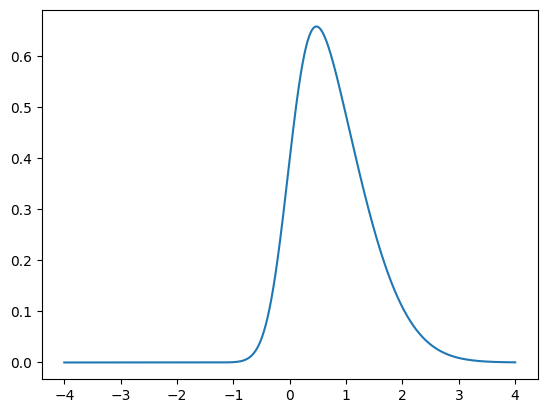

In [55]:

from scipy.stats import skewnorm

# sqwed: a>0:-> right sqewed, a<0 left sqewed
data2 = skewnorm(3,mu,std).pdf(x)

#ploting: 
plt.plot(x,data2)

In [56]:
df1 = pd.DataFrame({
    "Normal": data1,
    "Skewed": data2
})

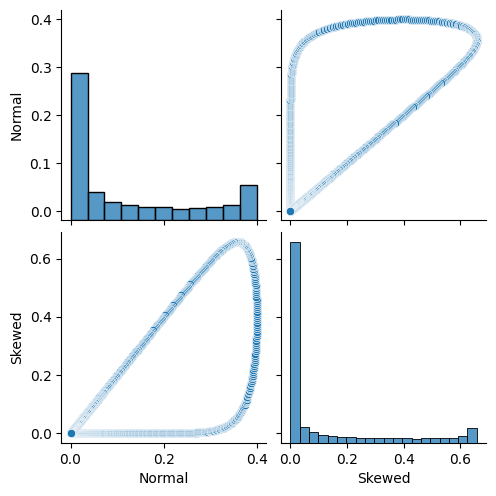

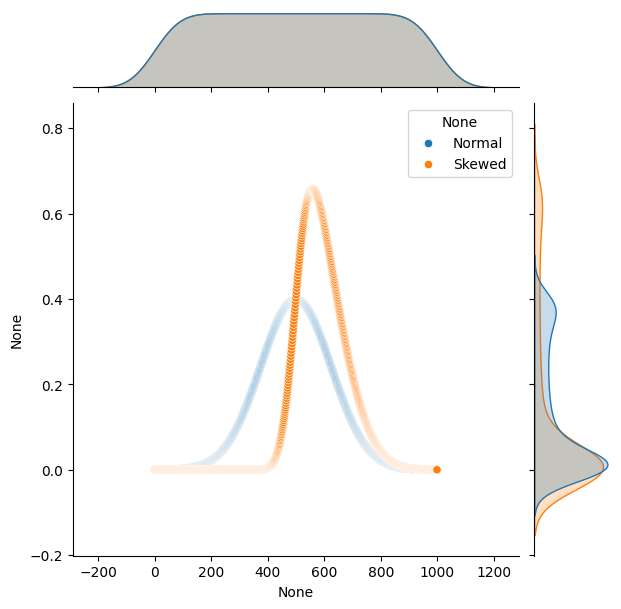

In [59]:
""" 
- **PDF:** give us continous value that's why we got 
pairplot and jointplot like this
"""

sns.pairplot(data=df1)
sns.jointplot(data=df1)


<br>
<br>

# `#02: Pair Plot, Joint Plot With: RVS`

<br>
<br>

--- 

### 🔹 PDF (Probability Density Function)

* Returns a **continuous density value** (not probability itself, but probability *per unit length*).
* The PDF is a continuous curve for continuous distributions (like normal).
* The area **under the PDF curve** over an interval gives probability.

Example:

* `pdf(0)` for $N(0,1)$ ≈ 0.3989 → this is the *density* at $x=0$, not a probability.

---

### 🔹 RVS (Random Variates / Samples):
* Returns **random samples** (values) that follow the distribution.
* These samples are **drawn from a continuous distribution**, but the outputs are just numbers (discrete in the sense that your computer gives finite values, but conceptually they come from a continuous set).

--- 
Example:

* `rvs(size=5)` → `[0.23, -1.05, 0.88, -0.14, 1.77]` → these are not probabilities, just values drawn from the normal distribution.


<br>

✅ Summary: 

* **PDF** → continuous function that describes the *shape of the distribution*.
* **RVS** → gives you actual *sample values* (which are continuous random variables if the distribution is continuous).


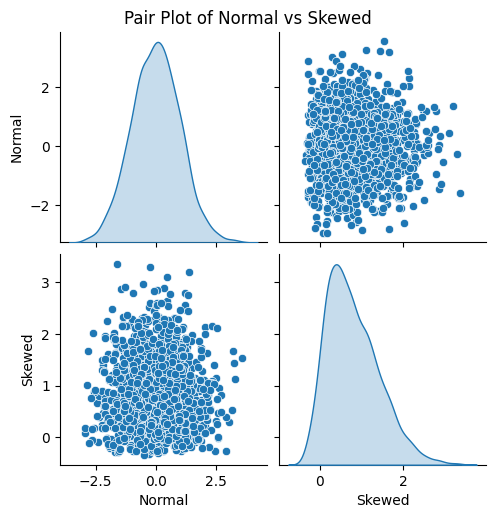

In [ ]:


a = 5 

# Sample data
n_samples = 2000
samples_normal = norm(mu, std).rvs(size=n_samples)
samples_skewed = skewnorm(a, mu, std).rvs(size=n_samples)

# Put into DataFrame
df = pd.DataFrame({
    "Normal": samples_normal,
    "Skewed": samples_skewed
})

# Pair plot
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Pair Plot of Normal vs Skewed", y=1.02)
plt.show()


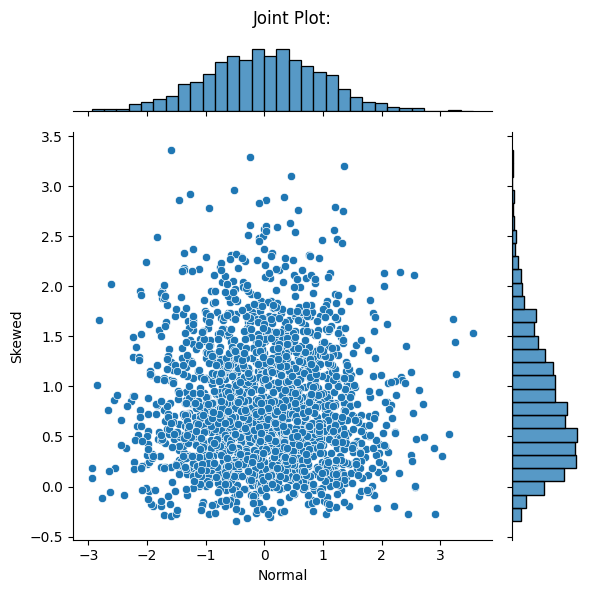

In [ ]:

# joint plot: --> with kind scatter
sns.jointplot(data=df,x="Normal",y="Skewed",kind="scatter")
plt.suptitle("Joint Plot: ")
plt.tight_layout()
plt.show()


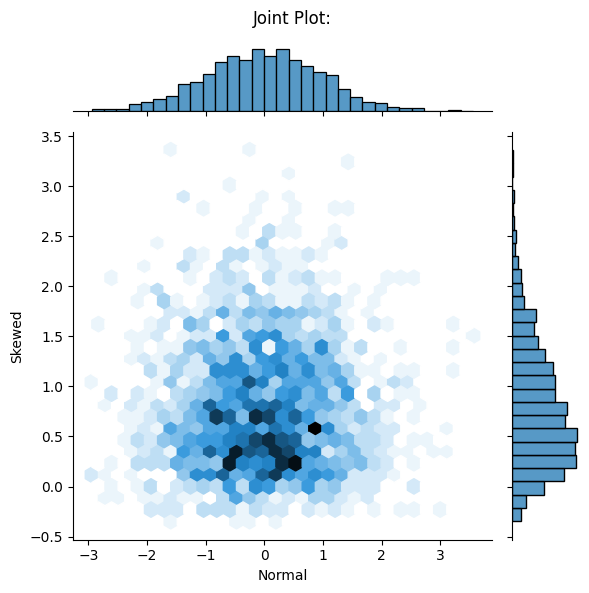

In [ ]:

# jointplot:)---> hex
sns.jointplot(data=df,x="Normal",y="Skewed",kind="hex")
plt.suptitle("Joint Plot: ")
plt.tight_layout()
plt.show()

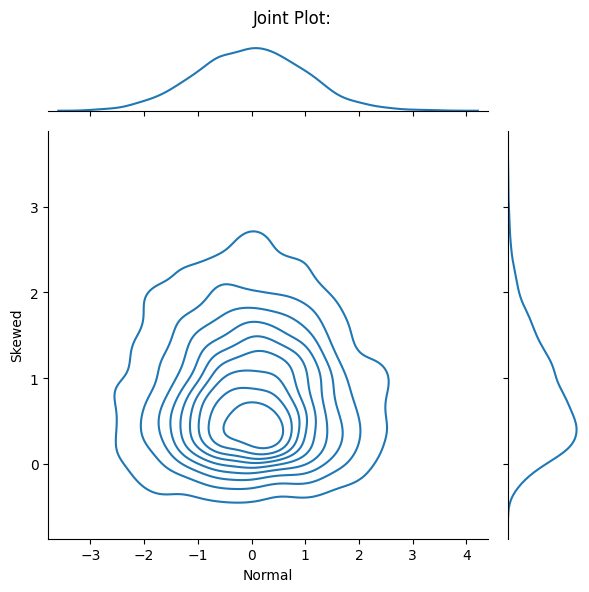

In [ ]:

# jointplot()--> kind(kde) --> No color no understanding
sns.jointplot(data=df,x="Normal",y="Skewed",kind="kde")
plt.suptitle("Joint Plot: ")
plt.tight_layout()
plt.show()

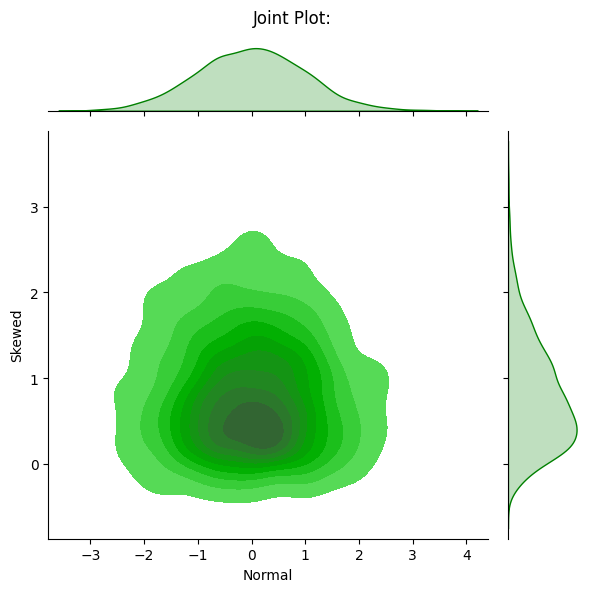

In [77]:

# jointplot()--> kind(kde) --> with color 
sns.jointplot(data=df,x="Normal",y="Skewed",kind="kde",fill=True,color="green")
plt.suptitle("Joint Plot: ")
plt.tight_layout()
plt.show()

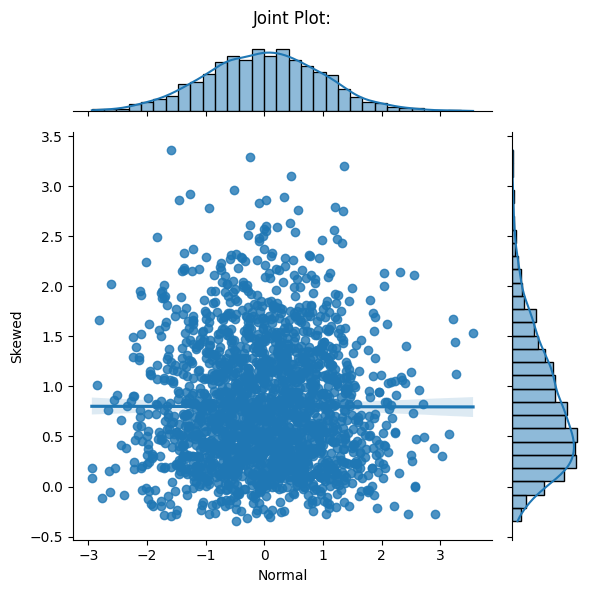

In [71]:


# jointplot()--> kind(kde) --> with color 
sns.jointplot(data=df,x="Normal",y="Skewed",kind="reg")
plt.suptitle("Joint Plot: ")
plt.tight_layout()
plt.show()

<Br>
<Br>

# `#03: Bivariate Normal Distributions:`

<Br>

আমার কাছে, দুইটা normal distribution আছে। এখন, ইচ্ছে করলে তো, আমি এইটা থেকে একটা bivariabel normal distirbution draw করতে পারি তাই না??? Let's go:




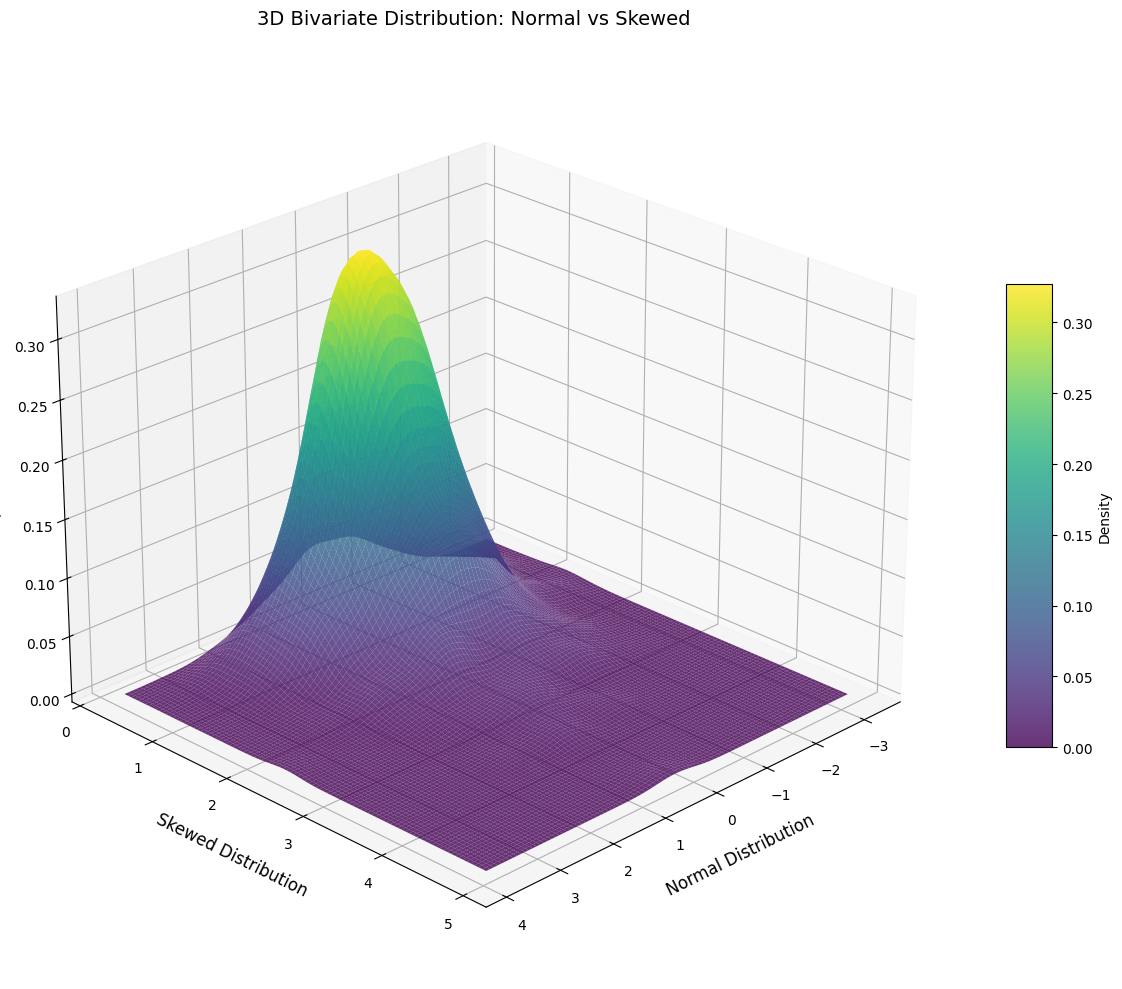

In [84]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
import pandas as pd
import seaborn as sns


# 3D Surface:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')


x = df['Normal']
y = df['Skewed']

# Grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xx, yy = np.meshgrid(xi, yi)

# KDE (Kernel Density Estimation)--> density calculate:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = gaussian_kde(values)
zz = np.reshape(kernel(positions).T, xx.shape)

# 3D surface plot
surf = ax.plot_surface(xx, yy, zz, cmap='viridis', 
                       edgecolor='none', alpha=0.8, 
                       rstride=1, cstride=1)

# Colorbar 
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Density')

# level and title:
ax.set_xlabel('Normal Distribution', fontsize=12, labelpad=10)
ax.set_ylabel('Skewed Distribution', fontsize=12, labelpad=10)
ax.set_zlabel('Density', fontsize=12, labelpad=10)
ax.set_title('3D Bivariate Distribution: Normal vs Skewed', fontsize=14, pad=20)

# Viewing angle সেট করুন (elevation এবং azimuth)
ax.view_init(elev=25, azim=45)

plt.tight_layout()
plt.show()

